## Linear Regression Using the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf



In this notebook, we will build some linear regression models to predict housing prices from this data.  We will split our data into training and test sets, build various models on the training data and compare their results on the test set. We will examine metrics such as *mean squared error* and *mean absolute deviation*.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV

## Load the Data, Examine and Explore

In [2]:
## Load in the Ames Housing Data
datafile = "../02-regression_scrape/data/Ames_Housing_Data.tsv"
df=pd.read_csv(datafile, sep='\t')

In [3]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape

(2925, 82)

There are a *lot* of variables, many of which have a lot of missing values.  Let's pick out just a few columns and start building models using that.

In [5]:
smaller_df= df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars','SalePrice']]

In [6]:
smaller_df.describe()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.765048,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.759834,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


In [7]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2924 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [8]:
# There appears to be one NA in Garage Cars - fill with 0
smaller_df = smaller_df.fillna(0)

In [9]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
SalePrice         2925 non-null int64
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


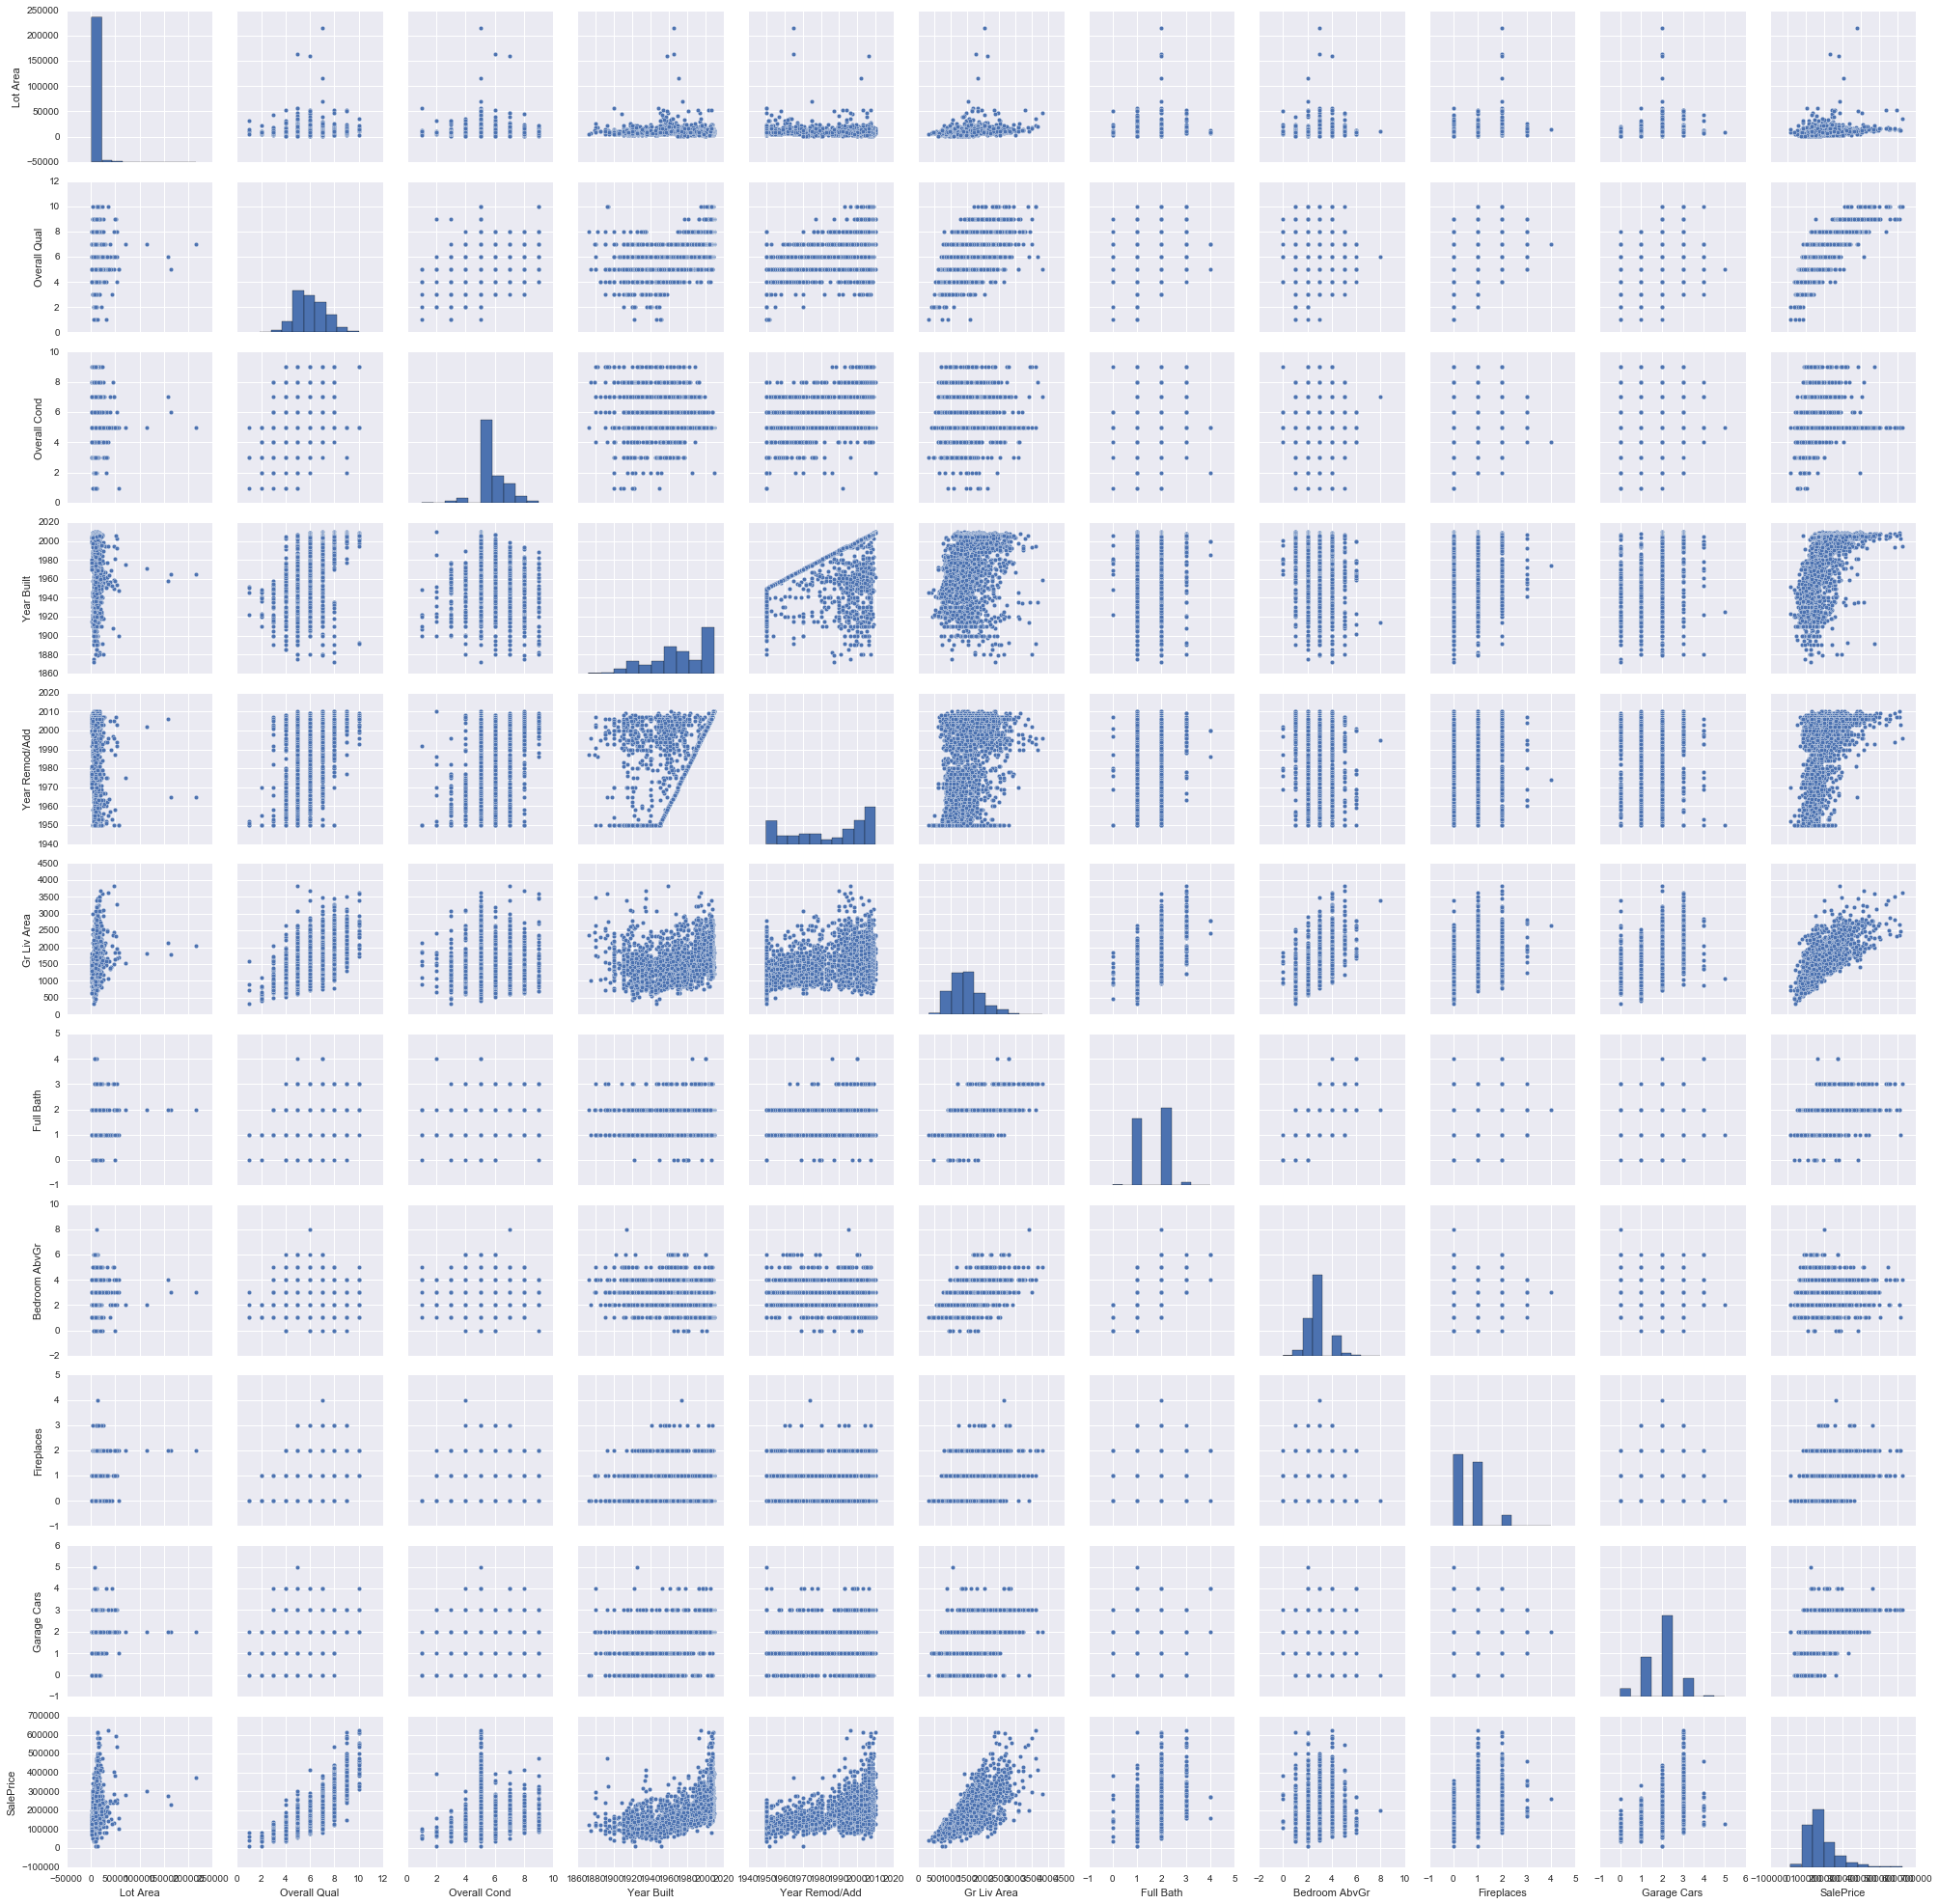

In [10]:
sns.pairplot(smaller_df)

### Data Exploration Questions
1. Which variables seem to have strong relationships with Sales Price?
1. The scatterplots of Year Built vs Year Add/Remod have an interesting structure.  Can you explain what is going on there?
1. In the plot of "Lot Area" vs. "SalePrice", some outliers are making the plot less visually useful.  How can we make the plot look better?

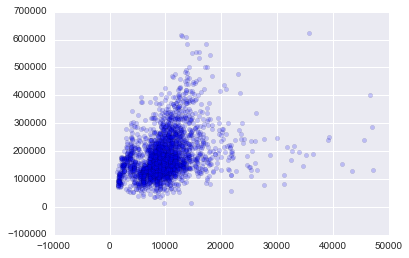

In [11]:
plt.scatter(smaller_df.loc[smaller_df['Lot Area']<50000,'Lot Area'], smaller_df.loc[smaller_df['Lot Area']<50000,'SalePrice'], alpha=.2)

In [12]:
#Separate our features from our target

X=smaller_df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars']]

y=smaller_df['SalePrice']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


In [14]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [15]:
X_train.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars'],
      dtype='object')

## One Variable Linear Regression
To begin, we will do a simple one variable linear regression, predicting the Sales Price using the Square Footage (Gr Liv Area) of the house.

In [16]:
# First let us fit only on Living Area (sqft)
selected_columns_1 = ['Gr Liv Area']

In [17]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train.loc[:,selected_columns_1],y_train)

/Applications/anaconda/envs/py3env/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lr_model1.coef_, lr_model1.intercept_

(array([ 112.05335187]), 12169.835728455422)

### Comprehension Question
What do the coefficients above represent?  How can they be interpreted?

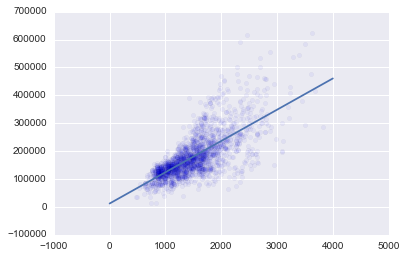

In [19]:
plt.scatter(X_train['Gr Liv Area'],y_train,alpha=.05)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

In [20]:
### Get the predictions on the training set
train_set_pred1 = lr_model1.predict(X_train.loc[:,selected_columns_1])

In [21]:
### Get the predictions on the test set
test_set_pred1 = lr_model1.predict(X_test.loc[:,selected_columns_1])

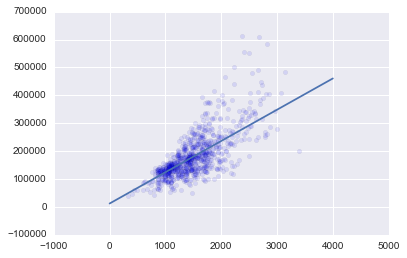

In [22]:
### Plot the regression line on top of the data

plt.scatter(X_test['Gr Liv Area'],y_test,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1)

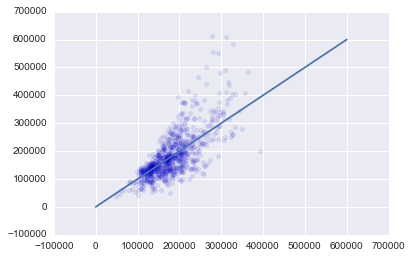

In [23]:
## Plot predicted vs actual 

plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

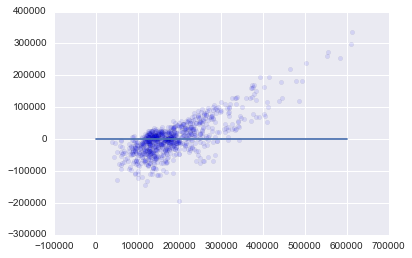

In [24]:
## Residual Plot
## Plot predicted vs actual 

plt.scatter(y_test,y_test-test_set_pred1,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [25]:
# How good is our model on the test set?

# Root Mean Square Error
np.sqrt(np.mean((test_set_pred1 - y_test)**2))

55396.914785455971

In [26]:
# Mean Absolute Deviation
(np.mean(np.abs(test_set_pred1 - y_test)))

38254.522567937987

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
np.sqrt(mean_squared_error(y_test, test_set_pred1)), mean_absolute_error(y_test,test_set_pred1)

(55396.914785455971, 38254.522567937987)

### Multiple Linear Regression
We will now do a regression on several variables.  We will no longer be able to see the regression line so simply in a graph, but we can still look at the predicted vs actual and residual plots

In [29]:
selected_columns_2 = ['Lot Area', 'Overall Qual', 'Year Built', 'Gr Liv Area']

In [30]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,selected_columns_2],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lr_model2.coef_

array([  1.56256997e+00,   2.58564462e+04,   5.19205946e+02,
         5.78490930e+01])

In [32]:
lr_model2.intercept_

-1102707.3312555577

In [33]:
list(zip(selected_columns_2,lr_model2.coef_))

[('Lot Area', 1.5625699653791214),
 ('Overall Qual', 25856.446165844023),
 ('Year Built', 519.20594585521542),
 ('Gr Liv Area', 57.849092972123586)]

### Comprehension Question
What do these coefficients mean?  Why does `'Gr Liv Area'` have a different coefficient this time?

In [34]:
X.corr()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
Lot Area,1.000000,0.083256,-0.032795,0.017049,0.015887,0.258529,0.121394,0.138169,0.247698,0.176047
Overall Qual,0.083256,1.000000,-0.093902,0.596621,0.569498,0.564797,0.518713,0.061772,0.387174,0.598127
Overall Cond,-0.032795,-0.093902,1.000000,-0.368533,0.048356,-0.116169,-0.214322,-0.006207,-0.030648,-0.181384
Year Built,0.017049,0.596621,-0.368533,1.000000,0.611444,0.239305,0.468485,-0.055650,0.167803,0.537146
Year Remod/Add,0.015887,0.569498,0.048356,0.611444,1.000000,0.318860,0.456708,-0.021801,0.130699,0.423511
Gr Liv Area,0.258529,0.564797,-0.116169,0.239305,0.318860,1.000000,0.637511,0.534222,0.449018,0.493222
Full Bath,0.121394,0.518713,-0.214322,0.468485,0.456708,0.637511,1.000000,0.358727,0.225748,0.474841
Bedroom AbvGr,0.138169,0.061772,-0.006207,-0.055650,-0.021801,0.534222,0.358727,1.000000,0.075856,0.090296
Fireplaces,0.247698,0.387174,-0.030648,0.167803,0.130699,0.449018,0.225748,0.075856,1.000000,0.319385
Garage Cars,0.176047,0.598127,-0.181384,0.537146,0.423511,0.493222,0.474841,0.090296,0.319385,1.000000


In [35]:
test_set_pred2 = lr_model2.predict(X_test.loc[:,selected_columns_2])

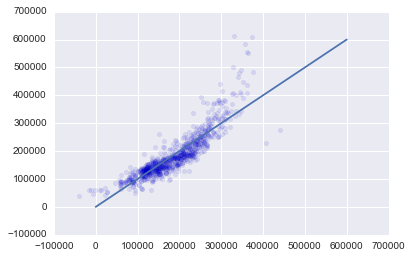

In [36]:
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

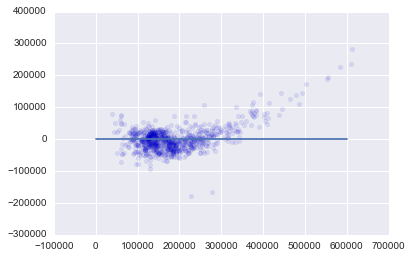

In [37]:
plt.scatter(y_test, y_test-test_set_pred2,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [38]:
#RMSE
np.sqrt(np.mean((test_set_pred2 - y_test)**2))

37638.850393449371

In [39]:
#MAD
(np.mean(np.abs(test_set_pred2 - y_test)))

25686.833930193559

Next, let us try using all of the variables (in the reduced selection)

In [40]:
lr_model3 = LinearRegression()
lr_model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
list(zip(X_train.columns,lr_model3.coef_))

[('Lot Area', 1.400432021865853),
 ('Overall Qual', 20121.193329127571),
 ('Overall Cond', 5375.7667721426005),
 ('Year Built', 555.79521078181972),
 ('Year Remod/Add', 125.75290884195184),
 ('Gr Liv Area', 73.085251802197547),
 ('Full Bath', -9259.533699227477),
 ('Bedroom AbvGr', -10307.987722698343),
 ('Fireplaces', 4668.0066075468876),
 ('Garage Cars', 9931.5700093968971)]

In [42]:
test_set_pred3 = lr_model3.predict(X_test)

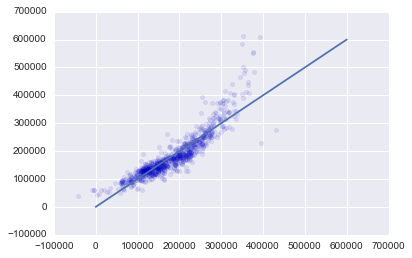

In [43]:
plt.scatter(test_set_pred3,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

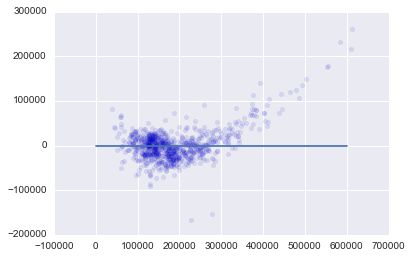

In [44]:
plt.scatter(y_test,y_test-test_set_pred3,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [45]:
#RMSE
np.sqrt(np.mean((test_set_pred3 - y_test)**2))

34427.46045160028

In [46]:
#MAD
(np.mean(np.abs(test_set_pred3 - y_test)))

23113.614375666726

### Adding a quadratic factor
Again, we see that our residual plot indicates some non-linearity.

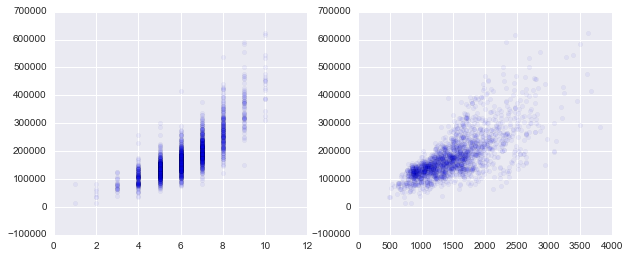

In [47]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train['Overall Qual'],y_train, alpha = .05)

ax[1].scatter(X_train['Gr Liv Area'],y_train, alpha = .05)

Let's try adding in `'Overall Qual'` *squared* as a predictor variable

In [48]:
X['OQ2'] = X['Overall Qual']**2
X.columns

Index(['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'OQ2'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [50]:
lr_model4 = LinearRegression()
lr_model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
list(zip(X_train.columns,lr_model4.coef_))

[('Lot Area', 1.3215582849561796),
 ('Overall Qual', -56025.994541560358),
 ('Overall Cond', 9050.9326196274287),
 ('Year Built', 650.9987836022492),
 ('Year Remod/Add', 76.507361162360098),
 ('Gr Liv Area', 63.084029601690503),
 ('Full Bath', -6605.5685951627238),
 ('Bedroom AbvGr', -4945.5724221705404),
 ('Fireplaces', 7564.6756149866687),
 ('Garage Cars', 8379.3392356713957),
 ('OQ2', 6158.6325800777695)]

In [52]:
test_set_pred4 = lr_model4.predict(X_test)

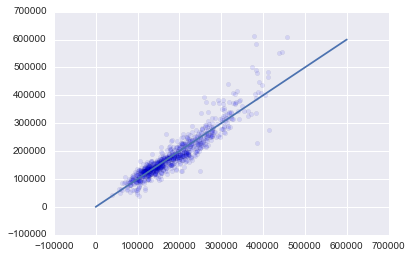

In [53]:
plt.scatter(test_set_pred4,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

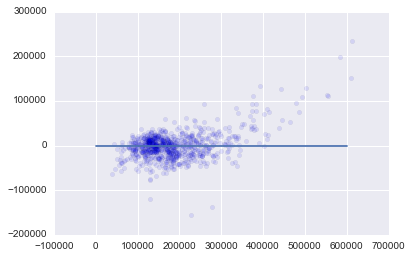

In [54]:
plt.scatter(y_test,y_test-test_set_pred4,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))

In [55]:
#RMSE
np.sqrt(np.mean((test_set_pred4 - y_test)**2))

29882.138332372979

In [56]:
#MAD
(np.mean(np.abs(test_set_pred4 - y_test)))

20137.742795243688

### Day 2

You may have heard of the term *R-squared*.  R-squared measures the "percentage of variance explained by the predictors".  Another way to express this is to calculate the "sum of squares" in two different ways:
1. Using the squared differences between our prediction and the actual value
2. Using the squared differences between the mean of y and the actual value

(So in the second variant above, you can think of it as a really naive prediction where you just guess the mean of y for every entry, regardless of the value of the predictors)

The first number is called the SSE (sum of squares error).  The second number is called the SST (sum of squares total).  So then SSE/SST is what percentage of the total variance *remains* after the predictors are factored in.  Therefore $1-\frac{SSE}{SST}$ is the *explained variance*.  $R^2 = 1-\frac{SSE}{SST}$.

In [57]:
## R-squared
SSE = np.sum(np.mean((test_set_pred4 - y_test)**2))
SST = np.sum(np.mean((np.mean(y_test) - y_test)**2))
r_squared = 1-SSE/SST
r_squared

0.86216404976009497

In [58]:
## can also use the sklearn function

from sklearn.metrics import r2_score
r2_score(y_test, test_set_pred4)

0.86216404976009497

In [59]:
## Each model in sklearn has a designated "score".
## For LinearRegression, r^2 is the designated "score"
## This function does the predictions on X_test, and then computes the R^2 in one step
lr_model4.score(X_test,y_test)

0.86216404976009486

### Regularization
We have been playing around with adding in variables (or transformations of variables), and then seeing if they improve the model or not.  However, this can be a tedious process.

Regularized Linear Regression (sometimes called Penalized Linear Regression) tries to circumvent this by changing the *cost function*.  In "vanilla" linear regression, the coefficients are chosen purely to minimize the Sum of Squared Errors.  In Regularized Linear Regression, there is an additional component of the cost function that penalizes the "size" of the coefficients.  

Why penalize a coefficient?  At the simplest level, it forces a variable to be "worth it" in order to have a coefficient greater than zero.  This intuition extends to the size of the coefficient - in some ways it is a "simpler model" to have smaller coefficients (in absolute value) than larger ones.

Regularized Linear Regression introduces a "nuisance parameter" that says how strongly we want to penalize the coefficients.  At one extreme there is no penalty, and we revert back to "vanilla" Linear Regression.  At the other extreme, the penalty is so onerous that we set all of the coefficients to zero.  In between these two extremes are continuous set of models.  We will discuss how to choose the best value later on when we discuss *cross-validation*.

There are two main "flavors" of Regularized Linear Regression.  In the LASSO, we penalize the sum of the absolute values of the coefficients and in Ridge Regression we penalize the sum of the squares of the coefficients.  LASSO is often preferred for some detailed reasons we will discuss later.

Let's see some examples.

In [60]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [61]:
selected_columns_3 = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr',
       'Fireplaces', 'Garage Cars', 'OQ2']
#selected_columns_3 = ['Overall Qual','OQ2','Fireplaces','Full Bath','Fireplaces']

#selected_columns_3 = X_train.columns

In [62]:

lr_model5 = Lasso(alpha = 1000000)
lr_model5.fit(X_train.loc[:,selected_columns_3],y_train)

Lasso(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
list(zip(selected_columns_3,lr_model5.coef_))

[('Lot Area', 1.2749555294452883),
 ('Overall Qual', 0.0),
 ('Overall Cond', -0.0),
 ('Year Built', 0.0),
 ('Year Remod/Add', 0.0),
 ('Gr Liv Area', 102.77113534967337),
 ('Full Bath', 0.0),
 ('Bedroom AbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('Garage Cars', 0.0),
 ('OQ2', 0.0)]

In [64]:
test_set_pred5 = lr_model5.predict(X_test.loc[:,selected_columns_3])

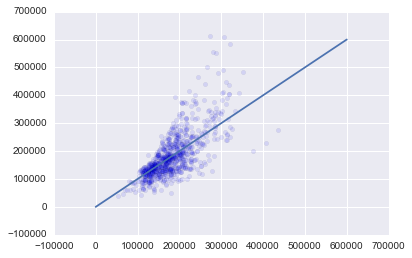

In [65]:
plt.scatter(test_set_pred5,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000))

In [66]:
#RMSE
np.sqrt(np.mean((test_set_pred5 - y_test)**2))

55995.019361997242

### Cross-Validation
Cross validation is a more sophisticated, yet more time intensive alternative to a single train-test split.  The idea is to divide your data set into "folds" (e.g. 5 equally sized subsets of your data).  We then iteratively select each fold to be the test set and the rest to be the training set.  We then judge the performance on the 5 different test folds.

This is frequently done to select "nuisance parameters".  You can try a bunch of different values, see which one gives the best results on cross validation, and then train your model on the entire data set using the best parameter value.

In [67]:
alphavec = 10**np.linspace(-3,9,27)
alphavec

array([  1.00000000e-03,   2.89426612e-03,   8.37677640e-03,
         2.42446202e-02,   7.01703829e-02,   2.03091762e-01,
         5.87801607e-01,   1.70125428e+00,   4.92388263e+00,
         1.42510267e+01,   4.12462638e+01,   1.19377664e+02,
         3.45510729e+02,   1.00000000e+03,   2.89426612e+03,
         8.37677640e+03,   2.42446202e+04,   7.01703829e+04,
         2.03091762e+05,   5.87801607e+05,   1.70125428e+06,
         4.92388263e+06,   1.42510267e+07,   4.12462638e+07,
         1.19377664e+08,   3.45510729e+08,   1.00000000e+09])

In [68]:
lr_model6 = LassoCV(alphas = alphavec, cv=5)
lr_model6.fit(X_train.loc[:,selected_columns_3],y_train)

LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [69]:
lr_model6.alpha_

0.001

In [70]:
list(zip(X_train.columns,lr_model6.coef_))

[('Lot Area', 1.3215583930973605),
 ('Overall Qual', -56025.967239830919),
 ('Overall Cond', 9050.9303660953683),
 ('Year Built', 650.99869974905948),
 ('Year Remod/Add', 76.507362779723579),
 ('Gr Liv Area', 63.08402691875181),
 ('Full Bath', -6605.5634646479821),
 ('Bedroom AbvGr', -4945.5724006091477),
 ('Fireplaces', 7564.6722377126398),
 ('Garage Cars', 8379.3364416262866),
 ('OQ2', 6158.6305800599475)]

In [71]:
test_set_pred6 = lr_model6.predict(X_test.loc[:,selected_columns_3])

In [72]:
#RMSE
np.sqrt(np.mean((test_set_pred6 - y_test)**2))

29882.138740042337

### Scaling Parameters
One issue with Regularized Linear Regression is that the "size" of a coefficient may be more reflective of the units or scale of the associated variable.  For example, if a distance is measured in millimeters it will have a smaller coefficient than if it is measured in miles.  For this reason, best practice is to "standardize" the variables prior to running a regularized regression.  Standardizing means adding a constant and then dividing by another constant so that the resulting variable has mean 0 and standard deviation 1.  This ensures that the variables are penalized "fairly" with respect to one another.

We demonstrate how to do this below.

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [74]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(X_train)

In [76]:
## Apply the scaler to the test set

X_te = std.transform(X_test)

In [77]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not output any pandas objects

type(X_train),type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

(array([   8.,   12.,   66.,  181.,  131.,  165.,  365.,  319.,  190.,  610.]),
 array([-3.23791476, -2.78334123, -2.32876769, -1.87419416, -1.41962063,
        -0.96504709, -0.51047356, -0.05590003,  0.3986735 ,  0.85324704,
         1.30782057]),
 <a list of 10 Patch objects>)

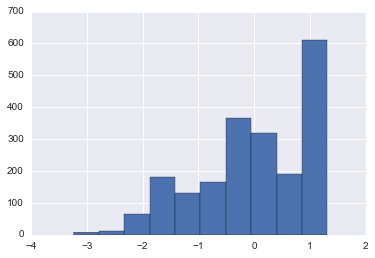

In [78]:
## Here we can plot histograms of the transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they do not necessarily seem to be normally distributed)

plt.hist(X_tr[:,3])

Now that we have appropriately scaled our variables, we can apply the LASSO as before.

What we did before was technically not good practice since the variables were on different scales.  Certain variables would be (unfairly) penalized more than others.

In [79]:
## Fit a LASSO model on the standardized data

lr_model7 = Lasso(alpha = 10000)
lr_model7.fit(X_tr,y_train)

Lasso(alpha=10000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
## Note, it is now difficult to interpret the coefficients
## Would have to do the math to translate back to the original scaling

list(zip(X_train.columns,lr_model7.coef_))

[('Lot Area', 2527.9040881501255),
 ('Overall Qual', 0.0),
 ('Overall Cond', 0.0),
 ('Year Built', 4926.0998993821786),
 ('Year Remod/Add', 0.0),
 ('Gr Liv Area', 20442.898332905104),
 ('Full Bath', 0.0),
 ('Bedroom AbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('Garage Cars', 5826.4046710707908),
 ('OQ2', 36294.069008164588)]

## Finding the "best" value of lambda (alpha) with a single train/test split
Here we will first decide on a vector of "candidate" alpha (lambda) values.  Then, for each candidate value, we run the following steps:
1. Standardize the training data
2. Fit a LASSO model on the training data
3. Using the newly trained model, make predictions on both the training data and the test data
4. Find the sum of squares error on both the training set and test set

Then we plot how the errors change for the different values of alpha.

We can then choose the alpha which gives us the best results on the test set.

In [81]:
alphalist = 10**(np.linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns_3], y_train)
    test_set_pred7 = pipe.predict(X_test.loc[:,selected_columns_3])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train.loc[:,selected_columns_3])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

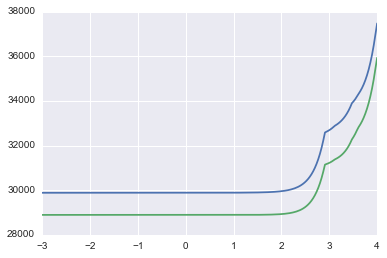

In [82]:
#plot the curves of both the training error and test error as alpha changes

plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)

In [83]:
## This is the minimum error achieved on the test set across the different alpha values we tried

np.min(err_vec_test)

29882.138653503178

In [84]:
## This is the value of alpha that gave us the lowest error
alphalist[np.argmin(err_vec_test)]

0.001

### Using LassoCV to find the best alpha via Cross-Validation
In the previous, we found the best alpha value by comparing the performance on a single train/test split.  An even better, though more computationally intensive method, is to do a full cross-validation when comparing the different alphas.  Fortunately, the `LassoCV` in sklearn handles this "under the hood".  You pass the `LassoCV` the list of alphas and the number of folds to use for Cross-Validation.  It will do the following:

- For each value of alpha
1. Do a cross-validation and score the result
- Find the value of alpha that gave the best score
- Fit the model on all the data using the value of alpha it just found

Then you can use the `predict` method of the model just as with all of our previous models

In [85]:
## Scale the data as before
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
## Scale the Predictors on both the train and test set
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [87]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
lr_model8 = LassoCV(alphas = alphavec, cv=5)
lr_model8.fit(X_tr,y_train)

LassoCV(alphas=array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03,   2.89427e+03,   8.37678e+03,
         2.42446e+04,   7.01704e+04,   2.03092e+05,   5.87802e+05,
         1.70125e+06,   4.92388e+06,   1.42510e+07,   4.12463e+07,
         1.19378e+08,   3.45511e+08,   1.00000e+09]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [88]:
# This is the best alpha value it found
lr_model8.alpha_

14.251026703029993

In [89]:
# These are the coefficients when it refit using that best alpha
list(zip(X_train.columns,lr_model8.coef_))

[('Lot Area', 9648.5909858190207),
 ('Overall Qual', -76448.176719458512),
 ('Overall Cond', 10145.173910191124),
 ('Year Built', 19664.126169640389),
 ('Year Remod/Add', 1593.381017129813),
 ('Gr Liv Area', 31258.631027708485),
 ('Full Bath', -3656.1844549900866),
 ('Bedroom AbvGr', -4099.0058533110487),
 ('Fireplaces', 4891.1830937976465),
 ('Garage Cars', 6283.7207370433989),
 ('OQ2', 106760.34982784197)]

In [90]:
# Make predictions on the test set using the new model
test_set_pred8 = lr_model8.predict(X_te)

In [91]:
# Find the RMSE on the test set using that model
np.sqrt(np.mean((test_set_pred8 - y_test)**2))

29887.533150139767

## LARS_Path
This is a tool used to visualize *all* of the models across the range of different alpha values.  At the far left is the value of alpha where the penalty on coefficients is *so* onerous, that it just sets all of the coefficients to zero.  At the far left is when there is no penalty, and corresponds to the values of the coefficients that you would get from a "vanilla" linear regression.

So each vertical slice corresponds to the coefficients you would get at a particular setting of alpha.  The black dotted lines indicate where a new variable "enters" the model (that is, its coefficient changes from 0 to non-zero).

This is a good way to see which variables are most influential and how their strengths change as you change the value of alpha.

In [92]:
from sklearn.linear_model import lars_path

In [93]:
## Scale the variables
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
X_tr = std.transform(X_train)


In [95]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

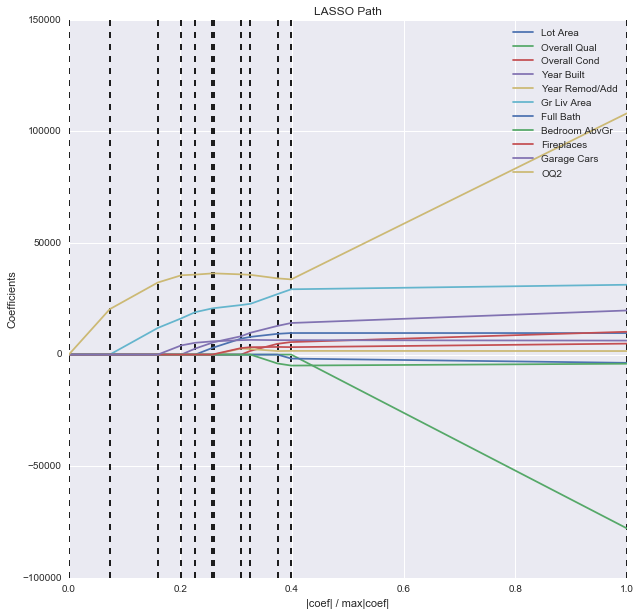

In [96]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()